# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING DATASET

In [ ]:
dataset = pd.read_csv("/content/bank-full.csv", encoding = 'latin1')

In [ ]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# INDEPENDENT AND DEPENDENT VARIABLE

In [ ]:
X = dataset.iloc[:,[0, 5]].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[  58, 2143],
       [  44,   29],
       [  33,    2],
       ...,
       [  72, 5715],
       [  57,  668],
       [  37, 2971]])

In [ ]:
y

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

# ENCODING THE CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

# SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [ ]:
X_train

array([[  39, 3870],
       [  31, 1073],
       [  36,  886],
       ...,
       [  35,  323],
       [  70,  616],
       [  46,   57]])

In [ ]:
X_test

array([[  37, 1403],
       [  36, -253],
       [  47, -406],
       ...,
       [  37,    0],
       [  41,  636],
       [  49, 4751]])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
X_train

array([[-0.18276354,  0.80402975],
       [-0.93754659, -0.09711178],
       [-0.46580719, -0.15735971],
       ...,
       [-0.56015507, -0.33874787],
       [ 2.74202077, -0.2443487 ],
       [ 0.47767162, -0.42444813]])

In [ ]:
X_test

array([[-0.36840084,  0.02698432],
       [-0.46205884, -0.55208089],
       [ 0.56817917, -0.60558148],
       ...,
       [-0.36840084, -0.4636126 ],
       [ 0.00623116, -0.24121799],
       [ 0.75549517,  1.19770311]])

# ML_ALGORITHM(LOGISTIC REGRESSION)

In [ ]:
# FITTING THE MODEL
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test 
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

# MAKING THE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[9975    3]
 [1325    0]]
0.8825090683889233


In [ ]:
# PREDICTING THE NEW DATA POINT
new_data=pd.DataFrame({"Age": 12, "Balance" : 120000},index=[0])
new_data

,Age,Balance
0,12,120000


In [ ]:
classifier.predict(new_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1])

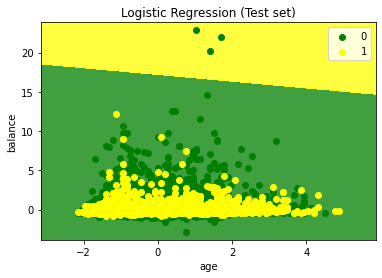

In [ ]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('green', 'yellow'))(i), label= j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('age')
plt.ylabel('balance')
plt.legend()
plt.show()

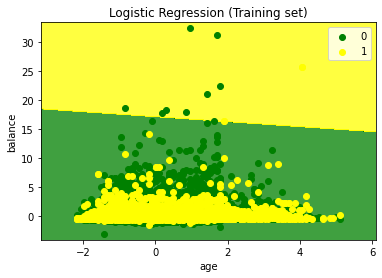

In [ ]:
#Visualizing the train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c= ListedColormap(('green', 'yellow'))(i), label= j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('age')
plt.ylabel('balance')
plt.legend()
plt.show()